## Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions.

In [2]:
#This is needed so that the plotted figures appear embedded in this notebook:
#%%matplotlib inline               
import numpy as np
import matplotlib.pyplot as plt

# loading automobile dataset
import pandas as pd 

# sns: used nomenclature for seaborn for datavisualization
import seaborn as sns    

#setting the standard color code ..styling
sns.set(color_codes=True) 





In [3]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [5]:
tips = sns.load_dataset('tips')


In [ ]:
#look at head of data ...successfully uploaded..looks neat
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Univariate distributions

how the data/variable distribution is for a single variable within our dataset


## Plotting univariate distributions

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).



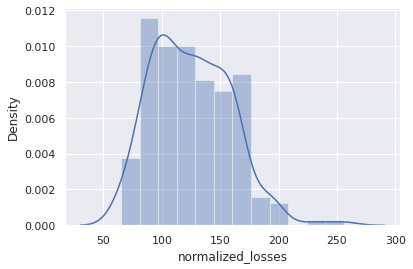

In [ ]:
sns.distplot(auto['normalized_losses'])
plt.show()

## Histograms

Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let’s remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the rugplot() function, but it is also available in displot():

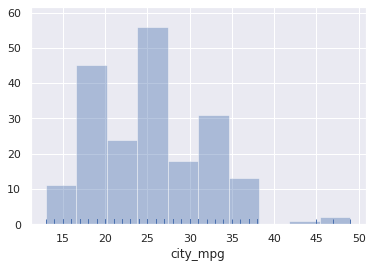

In [ ]:
sns.distplot(auto['city_mpg'], kde=False, rug=True);
plt.show()

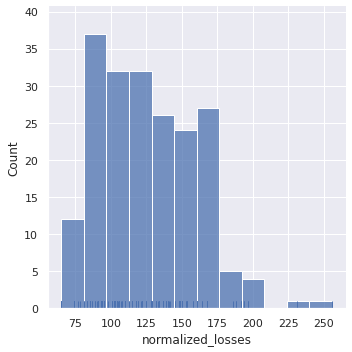

In [ ]:
sns.displot(auto['normalized_losses'], kde=False, rug=True);
plt.show()

## Plotting bivariate distributions

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

### Scatterplots

The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib plt.scatter function, and it is also the default kind of plot shown by the jointplot() function:

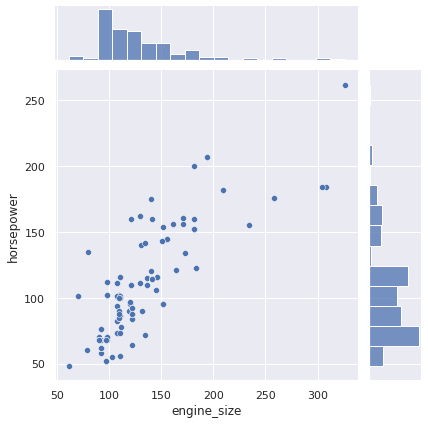

In [ ]:
x = auto.engine_size
y = auto.horsepower
sns.jointplot(x=x, y=y)
plt.show()


### Hex Bin Plots

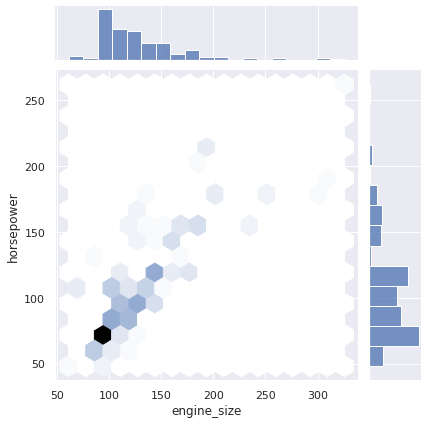

In [ ]:
x=auto.engine_size
y=auto.horsepower

#kind - {"scatter", "reg", "hex", "kde", "resid"}...diff options
sns.jointplot(x=x,y=y, kind="hex")

plt.show()

### Kernel Density Estimation

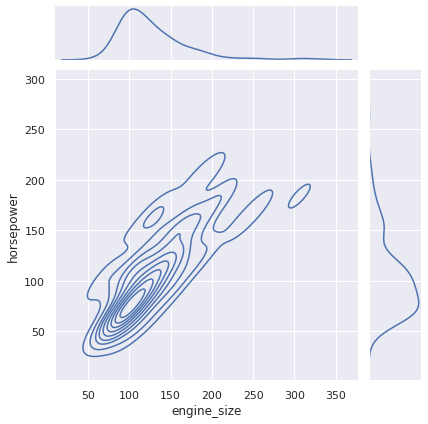

In [ ]:
x=auto.engine_size
y=auto.horsepower

sns.jointplot(x=x,y=y, kind="kde")
plt.show()

## Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:

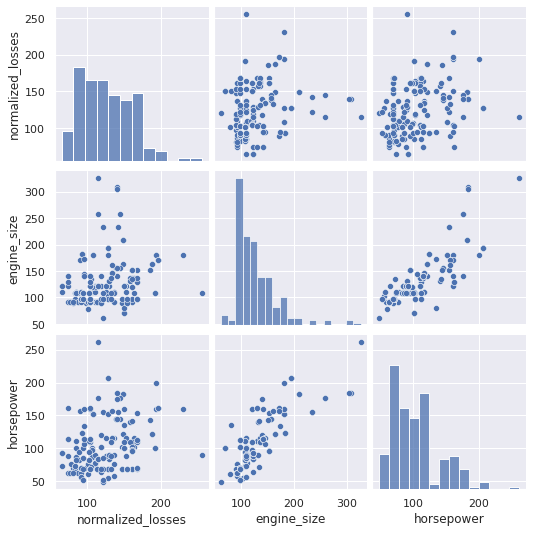

In [ ]:
sns.pairplot(auto[['normalized_losses', 'engine_size', 'horsepower']])
plt.show()

## Plotting with categorical data



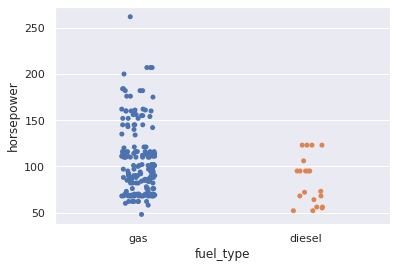

In [ ]:
x = auto.fuel_type
y = auto.horsepower
sns.stripplot(x=x, y=y)
plt.show()

In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random “jitter"

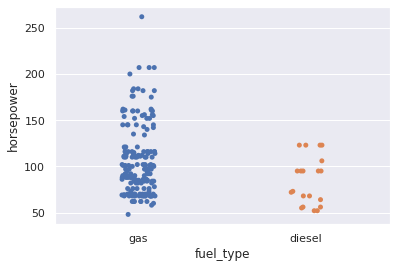

In [ ]:
x = auto.fuel_type
y = auto.horsepower
sns.stripplot(x=x, y=y, jitter =True)
plt.show()

A different approach would be to use the function swarmplot(), which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


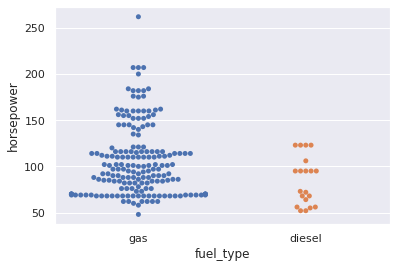

In [ ]:
x = auto.fuel_type
y = auto.horsepower
sns.swarmplot(x=x, y=y)
plt.show()

## Boxplots

The first is the familiar boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

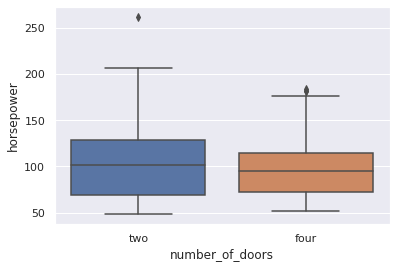

In [ ]:
x = auto.number_of_doors
y = auto.horsepower
sns.boxplot(x=x, y=y)
plt.show()

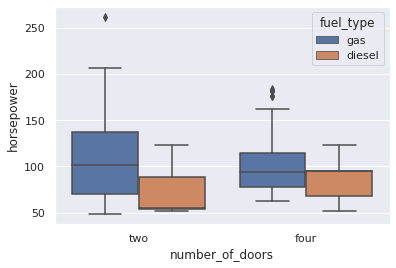

In [ ]:
x = auto.number_of_doors
y = auto.horsepower
z = auto.fuel_type
sns.boxplot(x=x, y=y, hue=z)
plt.show()


## Bar plots

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and shows an arbitrary estimate, using the mean by default. When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

Bar plots include 0
in the quantitative axis range, and they are a good choice when 0 is a
meaningful value for the quantitative variable, and you want to make
comparisons against it.

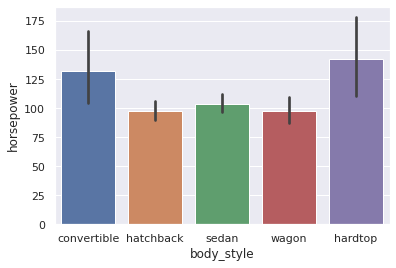

In [ ]:
x = auto.body_style
y = auto.horsepower
sns.barplot(x=x, y=y)
plt.show()

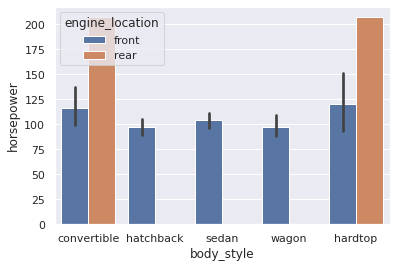

In [ ]:
x = auto.body_style
y = auto.horsepower
z = auto.engine_location
sns.barplot(x=x, y=y, hue=z)
plt.show()

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

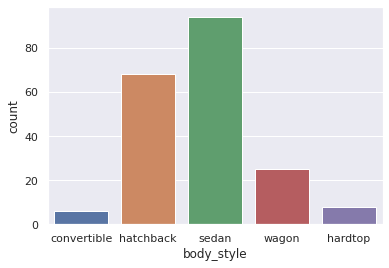

In [ ]:
x = auto.body_style
sns.countplot(x=x)

## Point plots

An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes:

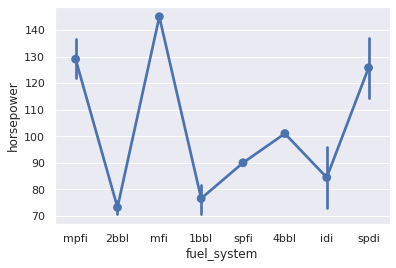

In [ ]:
x = auto.fuel_system
y = auto.horsepower
sns.pointplot(x=x, y=y)
plt.show()

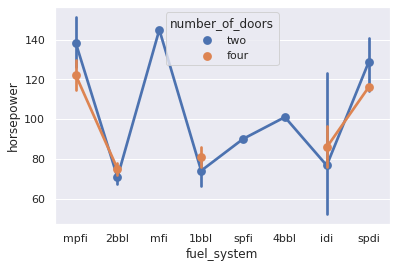

In [ ]:
x = auto.fuel_system
y = auto.horsepower
z = auto.number_of_doors
sns.pointplot(x=x, y=y, hue=z)
plt.show()

## Drawing multi-panel categorical plots

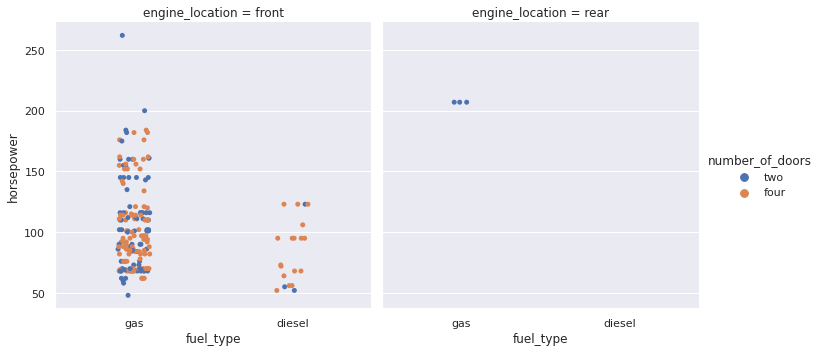

In [ ]:
#factor plot

sns.catplot(x="fuel_type", 
               y="horsepower", 
               hue="number_of_doors", 
               col="engine_location", 
               data=auto, 
               kind="strip")    # Various types of kind input : {point, bar, count, box, violin, strip, swarm}

plt.show()

## Function to draw linear regression models

lmplot() is one of the most widely used function to quickly plot the Linear Relationship b/w 2 variables

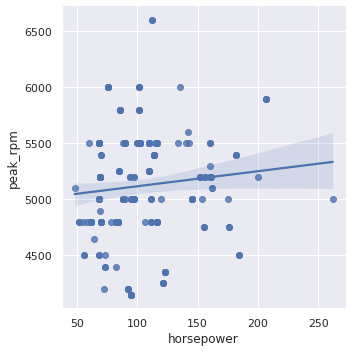

In [ ]:
sns.lmplot(x="horsepower", y="peak_rpm", data=auto)
plt.show()

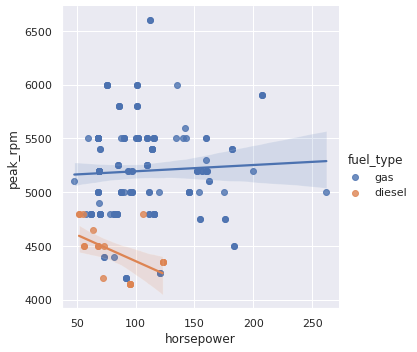

In [ ]:
sns.lmplot(x="horsepower", y="peak_rpm", data=auto, hue="fuel_type")
plt.show()